# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LassoCV

## Problem definition
We aim to explore how county-level socio-demographic factors and healthcare resources relate to overall health.

## Import data and create DataFrame

In [2]:
df = pd.read_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/raw/demographic_health_data.csv")
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


## Descriptive Analysis

In [3]:
# Check the dimensions
df.shape

(3140, 108)

In [4]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
# Generate a statistical summary of numerical columns and transpose it for readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


### Observations
- There are 3140 rows and 108 columns.
- No missing values.
- The data contains 106 numerical features and 2 categorical features.

## Data Cleaning

In [6]:
# Looking for duplicated data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3135    False
3136    False
3137    False
3138    False
3139    False
Length: 3140, dtype: bool

In [7]:
# Dropping duplicates if True
if df.duplicated().sum():
        df = df.drop_duplicates()
        
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


### Observations
No duplicates found.

In [8]:
df = df.drop(["0-9", "19-Oct", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "White-alone pop", "Black-alone pop", "Native American/American Indian-alone pop", "Asian-alone pop", "Hawaiian/Pacific Islander-alone pop", "Two or more races pop", "Less than a high school diploma 2014-18", "High school diploma only 2014-18", "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", "POP_ESTIMATE_2018", "N_POP_CHG_2018", "GQ_ESTIMATES_2018", "R_birth_2018", "R_death_2018", "R_NATURAL_INC_2018", "R_INTERNATIONAL_MIG_2018", "R_DOMESTIC_MIG_2018", "R_NET_MIG_2018", "POVALL_2018","PCTPOV017_2018", "PCTPOV517_2018", "CI90LBINC_2018", "CI90UBINC_2018", "Employed_2018", "Unemployed_2018", "Median_Household_Income_2018", "COUNTY_NAME", "STATE_NAME", "STATE_FIPS", "CNTY_FIPS", "anycondition_Lower 95% CI", "anycondition_Upper 95% CI", "Obesity_Lower 95% CI", "Obesity_Upper 95% CI", "Heart disease_Lower 95% CI", "Heart disease_Upper 95% CI", "COPD_Lower 95% CI", "COPD_Upper 95% CI", "diabetes_Lower 95% CI", "diabetes_Upper 95% CI", "CKD_Lower 95% CI", "CKD_Upper 95% CI"], axis = 1)
df

,fips,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,...,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,1001,55601,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,...,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,1003,218022,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,...,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,1005,24881,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,...,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,1007,22400,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,...,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,1009,57840,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,...,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,14.178532,14.694200,12.448027,15.277229,12.389956,12.220390,11.481731,5.105572,...,10672,5.9,1862,6.6,2098,8.9,2834,2.6,821,5
3136,56039,23081,10.328842,9.466661,12.854729,17.733200,14.830380,12.685759,12.456133,6.797799,...,3655,5.2,981,4.9,928,7.2,1360,2.4,447,5
3137,56041,20299,15.375142,15.788955,10.606434,13.311001,11.773979,11.990738,12.581901,6.074191,...,4944,7.2,1034,8.0,1163,10.4,1500,3.0,430,5
3138,56043,7885,10.881420,14.115409,9.067850,11.452124,11.414077,13.760304,14.178821,9.397590,...,1730,8.2,500,8.3,506,11.3,686,3.4,207,6


### Observations
We removed several columns for a few key reasons. First, many variables had multiple columns representing the same information in different ways (for example, both counts and percentages for age, race, or education) so we kept only the percentage or most informative version. Second, we removed highly specific or redundant categories (like individual age groups or racial subgroups) that were unlikely to add additional insight for predicting our target variable (anycondition_prevalence). Finally, we dropped columns that were identifiers or unlikely to influence health outcomes, such as county or state names and FIPS codes. This cleaning helps reduce noise, prevent redundancy, and focus our analysis on the most relevant socio-demographic and healthcare resource variables.

## Visualization
We divided the columns into eight groups to improve visualization and make the analysis more manageable.

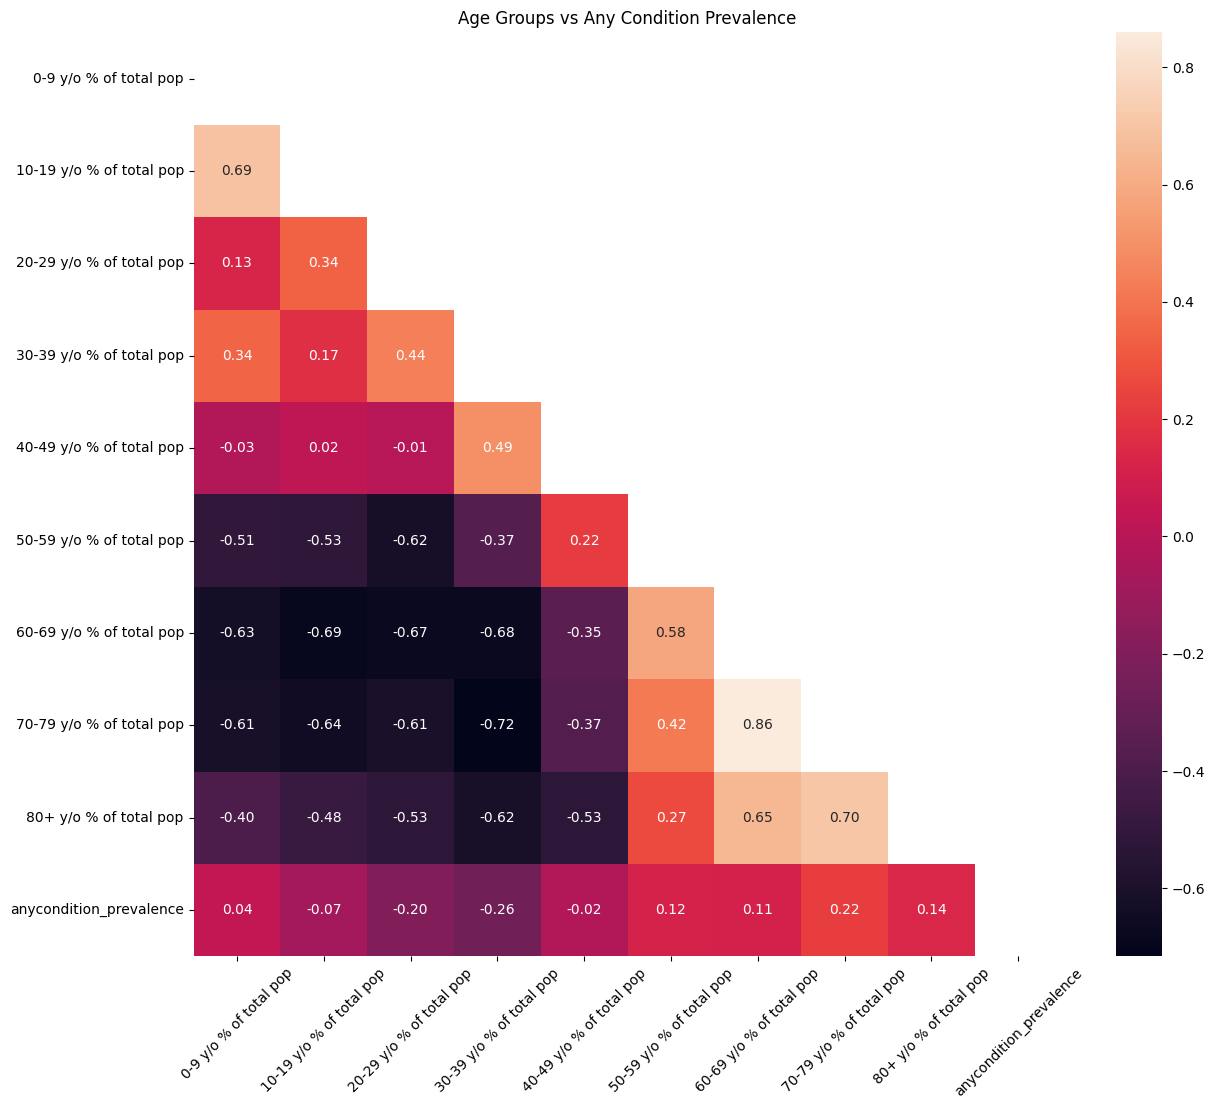

In [9]:
# First group: age + target
age_columns = ["0-9 y/o % of total pop", "10-19 y/o % of total pop", "20-29 y/o % of total pop", "30-39 y/o % of total pop", "40-49 y/o % of total pop",
               "50-59 y/o % of total pop", "60-69 y/o % of total pop", "70-79 y/o % of total pop", "80+ y/o % of total pop", "anycondition_prevalence"]

corr = df[age_columns].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

fig, axis = plt.subplots(figsize = (14, 12))
sns.heatmap(corr, mask = mask, annot = True, fmt = ".2f")
plt.title("Age Groups vs Any Condition Prevalence")
plt.xticks(rotation = 45)
plt.show()

In [10]:
# Combine age groups into broader categories
df["age 0-19 pct %"] = df["0-9 y/o % of total pop"] + df["10-19 y/o % of total pop"]
df["age 20-39 pct %"] = df["20-29 y/o % of total pop"] + df["30-39 y/o % of total pop"]
df["age 40-59 pct %"] = df["40-49 y/o % of total pop"] + df["50-59 y/o % of total pop"]
df["age 60-79 pct %"] = df["60-69 y/o % of total pop"] + df["70-79 y/o % of total pop"]
df["age 80+ pct %"] = df["80+ y/o % of total pop"]

In [11]:
# Drop original age columns
age_columns_to_drop = ["0-9 y/o % of total pop", "10-19 y/o % of total pop", "20-29 y/o % of total pop", "30-39 y/o % of total pop", "40-49 y/o % of total pop",
                       "50-59 y/o % of total pop", "60-69 y/o % of total pop", "70-79 y/o % of total pop", "80+ y/o % of total pop"]

df = df.drop(age_columns_to_drop, axis = 1)

### Observations
The original age group columns were highly correlated with each other but showed low correlation with the target variable (anycondition_prevalence). To simplify the analysis and reduce the number of features, we combined adjacent age groups into broader categories (0–19, 20–39, 40–59, 60-79). This preserves the overall demographic information while making the dataset more manageable and easier to interpret.

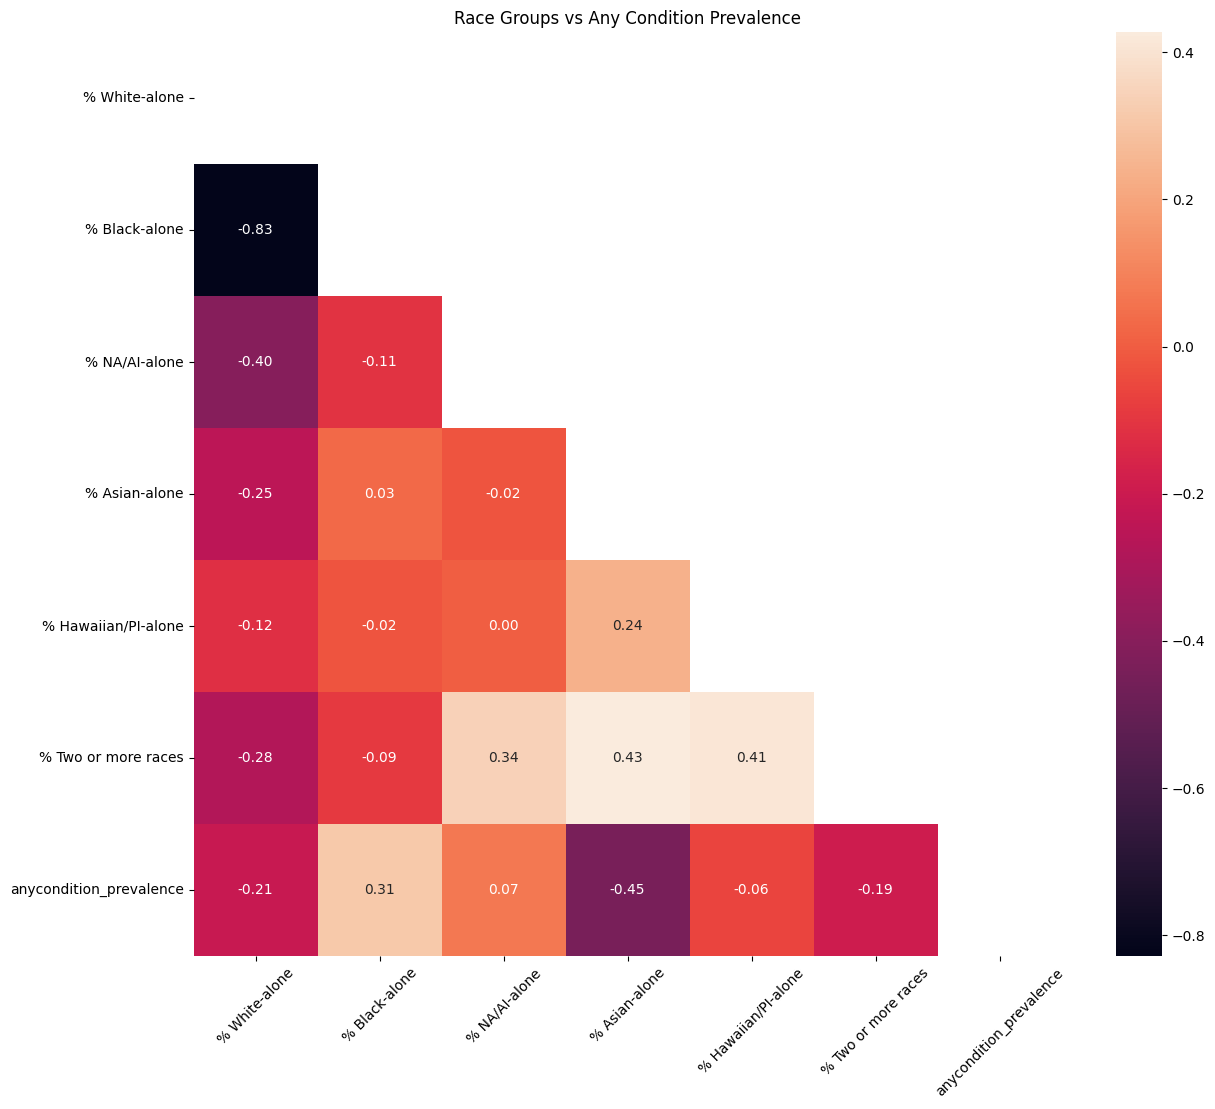

In [12]:
# Second group: race + target
race_columns = ["% White-alone", "% Black-alone", "% NA/AI-alone", "% Asian-alone", "% Hawaiian/PI-alone", "% Two or more races", "anycondition_prevalence"]

corr = df[race_columns].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

fig, axis = plt.subplots(figsize = (14, 12))
sns.heatmap(corr, mask = mask, annot = True, fmt = ".2f")
plt.title("Race Groups vs Any Condition Prevalence")
plt.xticks(rotation = 45)
plt.show()

### Observations
The correlations between race variables and the target (anycondition_prevalence) are generally low. The strongest correlation is –0.45 with % Asian-alone, indicating a weak negative relationship. Overall, racial composition does not appear to strongly predict the prevalence of any condition at the county level.

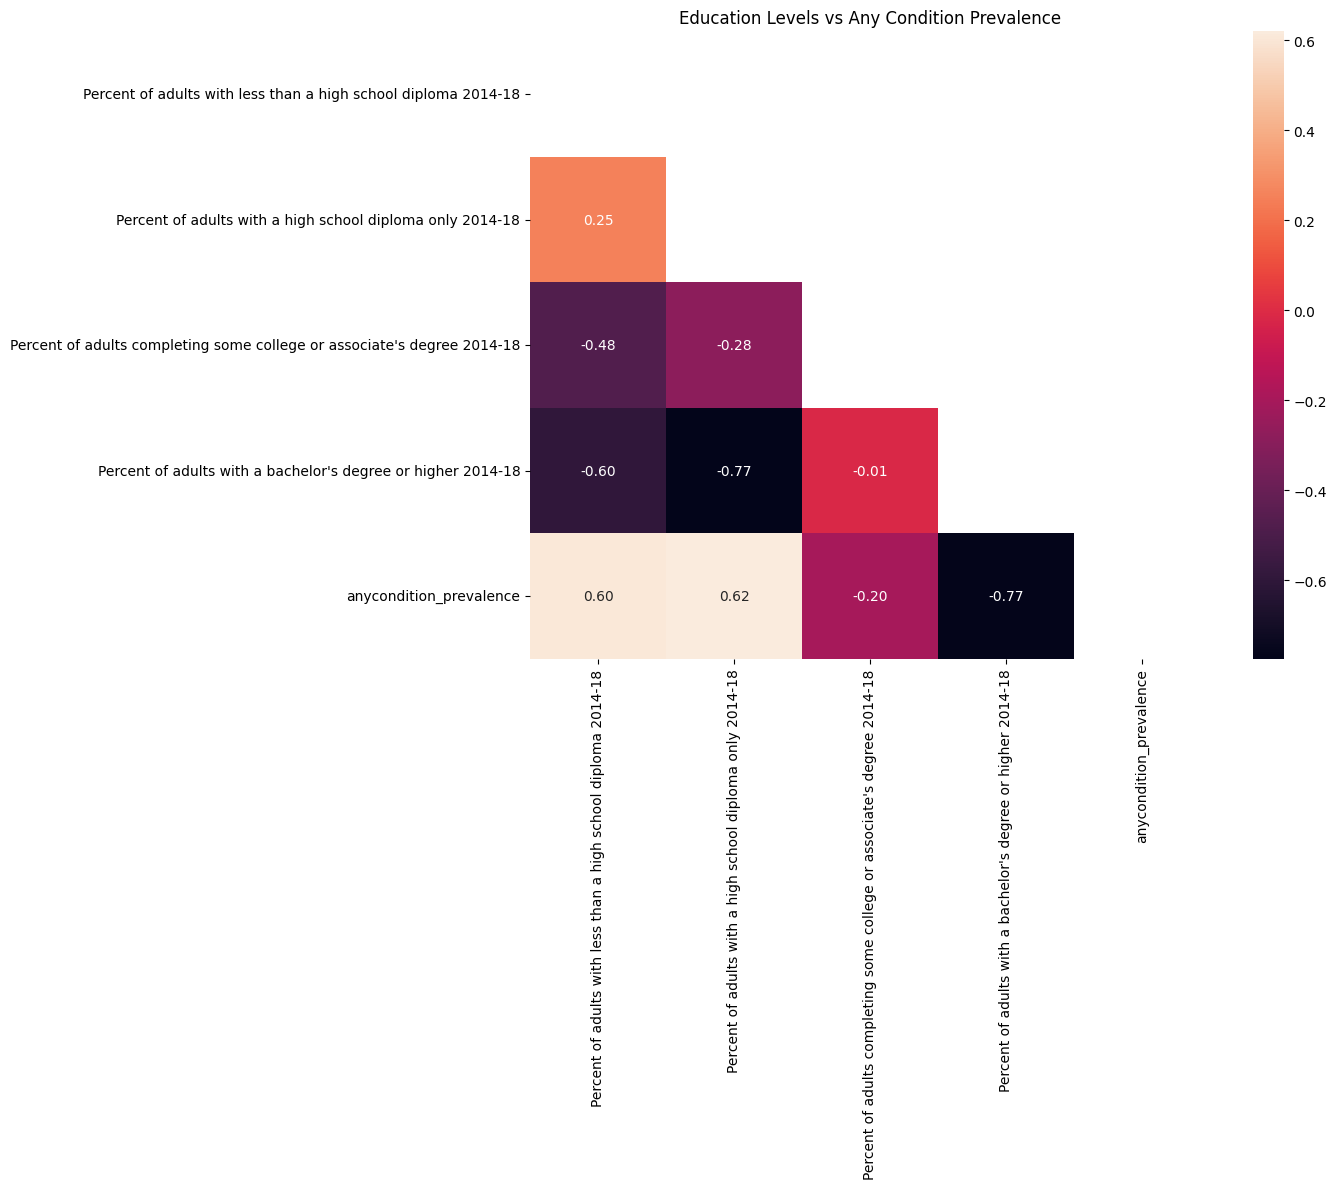

In [13]:
# Third group: education + target
education_columns = ["Percent of adults with less than a high school diploma 2014-18", "Percent of adults with a high school diploma only 2014-18",
                     "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", "anycondition_prevalence"]

corr = df[education_columns].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

fig, axis = plt.subplots(figsize = (14, 12))
sns.heatmap(corr, mask = mask, annot = True, fmt = ".2f")
plt.title("Education Levels vs Any Condition Prevalence")
plt.tight_layout()
plt.show()

### Observations
In the education group, the correlations with the target show moderate relationships: 0.60 with “Percent of adults with less than a high school diploma 2014-18”, 0.62 with “Percent of adults with a high school diploma only 2014-18”, and -0.77 with “Percent of adults with a bachelor's degree or higher 2014-18”. Between the variables, the strongest correlation is -0.77 between “Percent of adults with a high school diploma only 2014-18” and “Percent of adults with a bachelor's degree or higher 2014-18”. This indicates some inverse relationship between education levels, but all variables provide useful information, so they are kept for analysis.

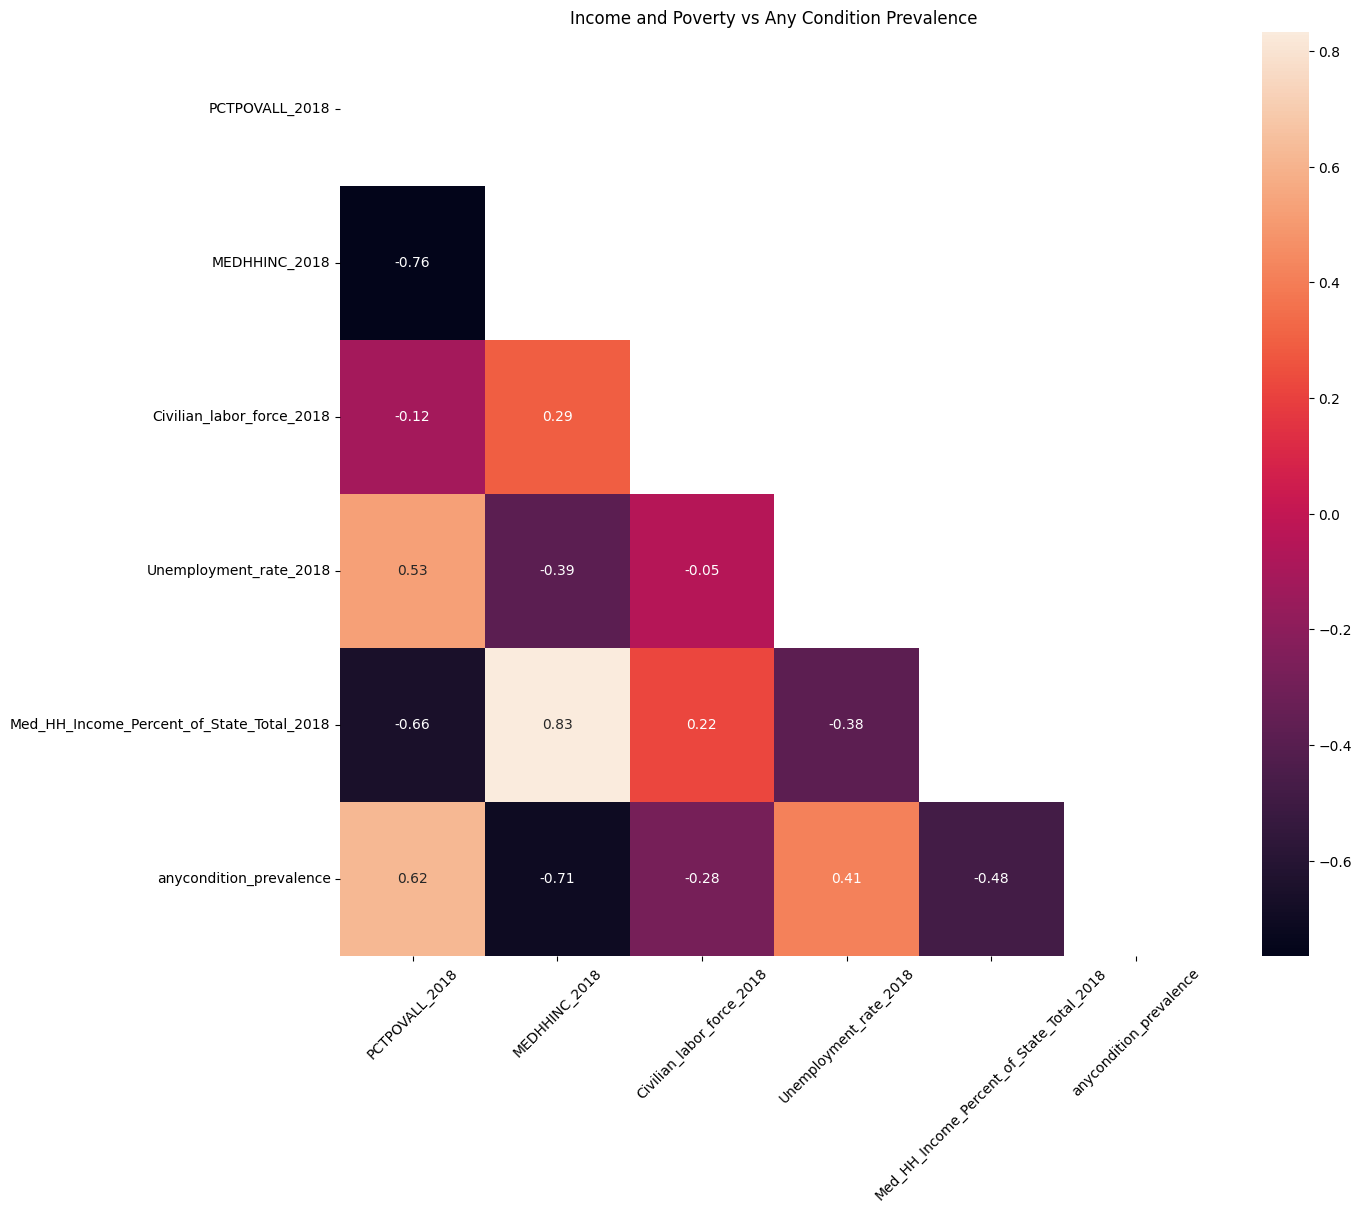

In [14]:
# Fourth group: income and poverty + target
income_columns = ["PCTPOVALL_2018", "MEDHHINC_2018", "Civilian_labor_force_2018", "Unemployment_rate_2018", "Med_HH_Income_Percent_of_State_Total_2018", "anycondition_prevalence"]

corr = df[income_columns].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

fig, axis = plt.subplots(figsize = (14, 12))
sns.heatmap(corr, mask = mask, annot = True, fmt = ".2f")
plt.title("Income and Poverty vs Any Condition Prevalence")
plt.xticks(rotation = 45)
plt.show()

In [15]:
# Dropping correlated column
df = df.drop(["Med_HH_Income_Percent_of_State_Total_2018"], axis = 1)

### Observations
In the Income and Poverty group, the variable Med_HH_Income_Percent_of_State_Total_2018 is highly correlated with median household income, indicating redundancy. It was removed to simplify the dataset and focus on variables that more directly represent local economic conditions. The remaining variables, such as PCTPOVALL_2018 and MEDHHINC_2018, still capture meaningful variation in poverty and income levels across counties, which are moderately correlated with the target variable, providing relevant information for health outcome analysis.

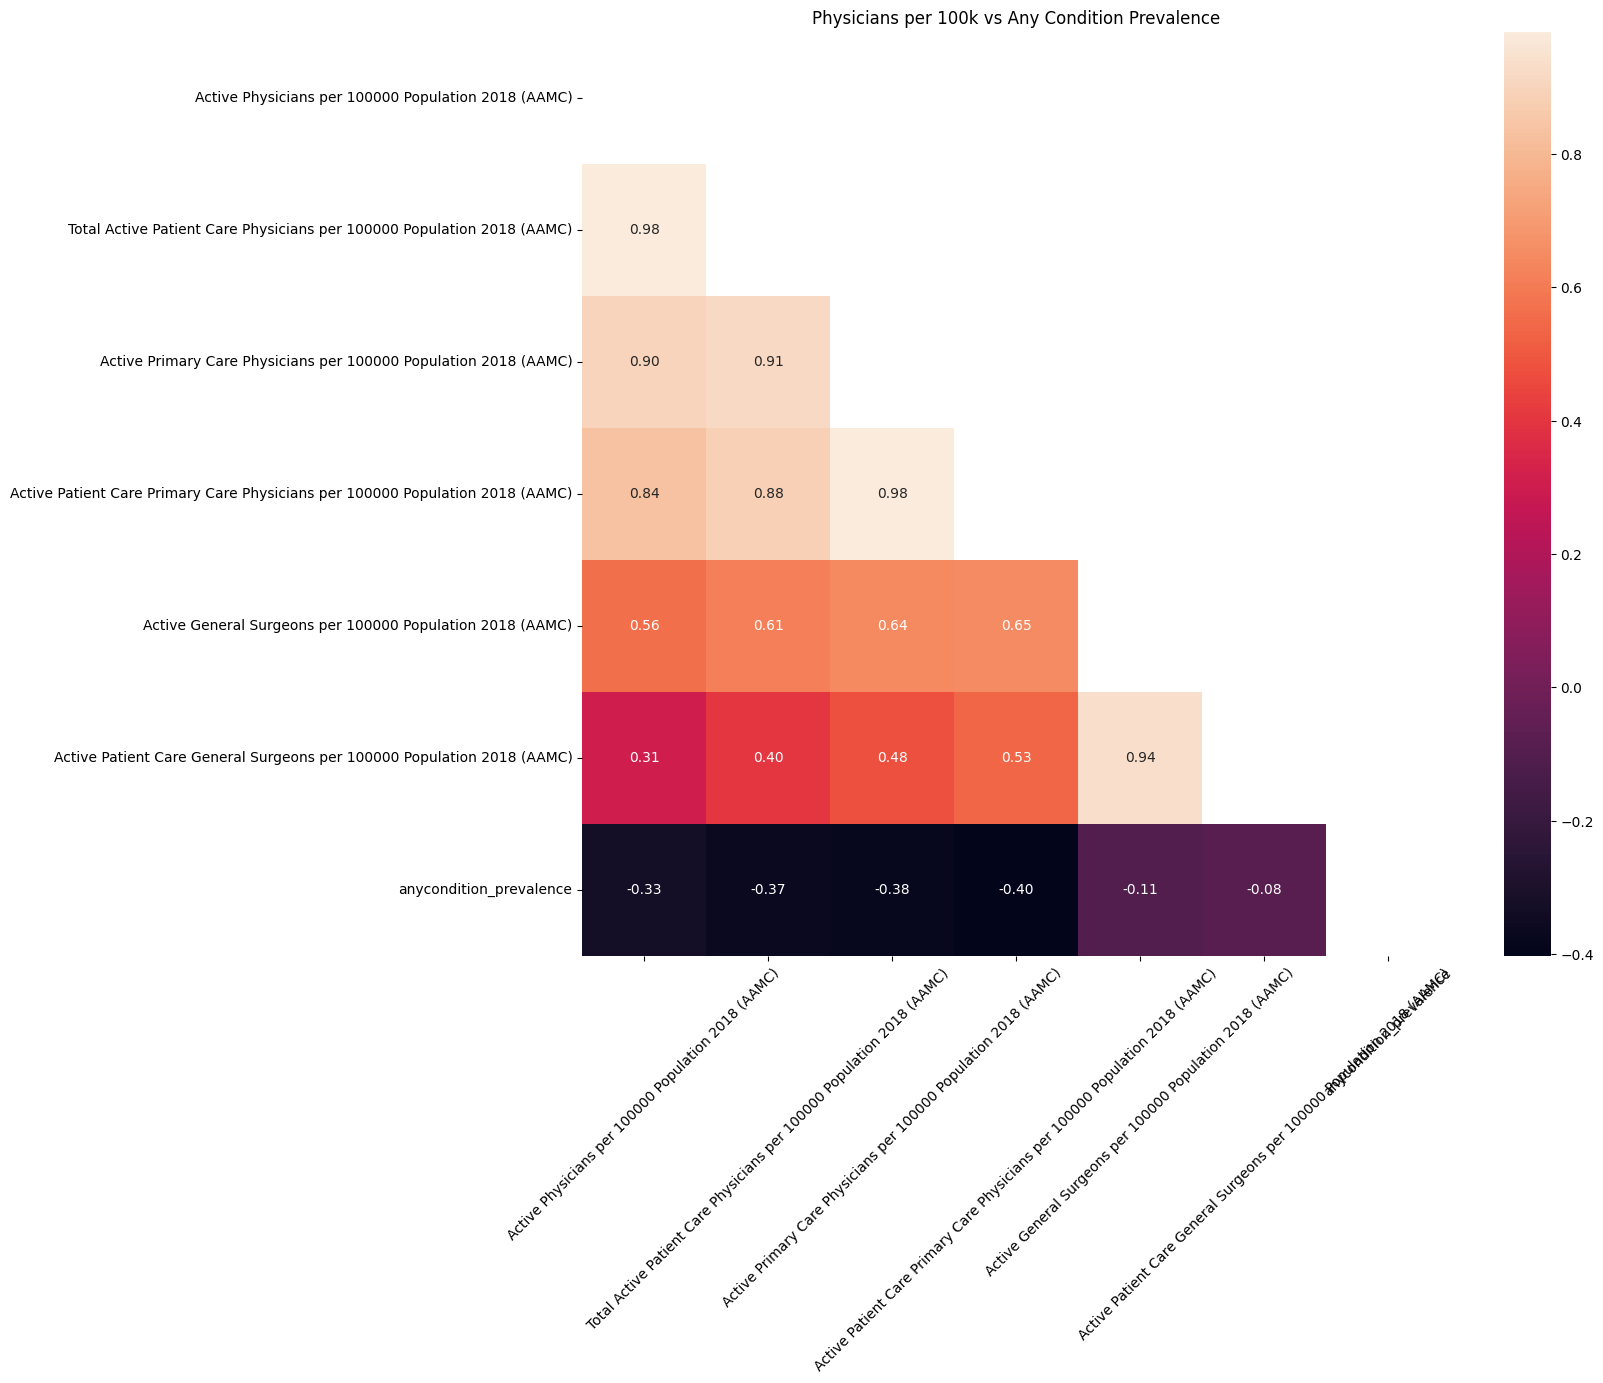

In [16]:
# Fifth group: physicians per 100k + target
physicians_columns = ["Active Physicians per 100000 Population 2018 (AAMC)", "Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)", "Active Primary Care Physicians per 100000 Population 2018 (AAMC)", 
                      "Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)", "Active General Surgeons per 100000 Population 2018 (AAMC)", "Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)", 
                      "anycondition_prevalence"]

corr = df[physicians_columns].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

fig, axis = plt.subplots(figsize = (14, 12))
sns.heatmap(corr, mask = mask, annot = True, fmt = ".2f")
plt.title("Physicians per 100k vs Any Condition Prevalence")
plt.xticks(rotation = 45)
plt.show()

In [17]:
# Dropping highly correlated physician variables
df = df.drop(["Active Primary Care Physicians per 100000 Population 2018 (AAMC)", "Active General Surgeons per 100000 Population 2018 (AAMC)"], axis = 1)

### Observations
In the “Physicians per 100,000 population” group, several variables are highly correlated, especially the primary care physician metrics. To reduce redundancy, we have removed "Active Primary Care Physicians per 100,000 Population 2018 (AAMC)" and "Active Patient Care Primary Care Physicians per 100,000 Population 2018 (AAMC)". These variables are strongly correlated (> 0.90) with the total active patient care physicians per 100,000 population and provide overlapping information. Removing them simplifies the dataset while retaining the overall measure of physician availability.

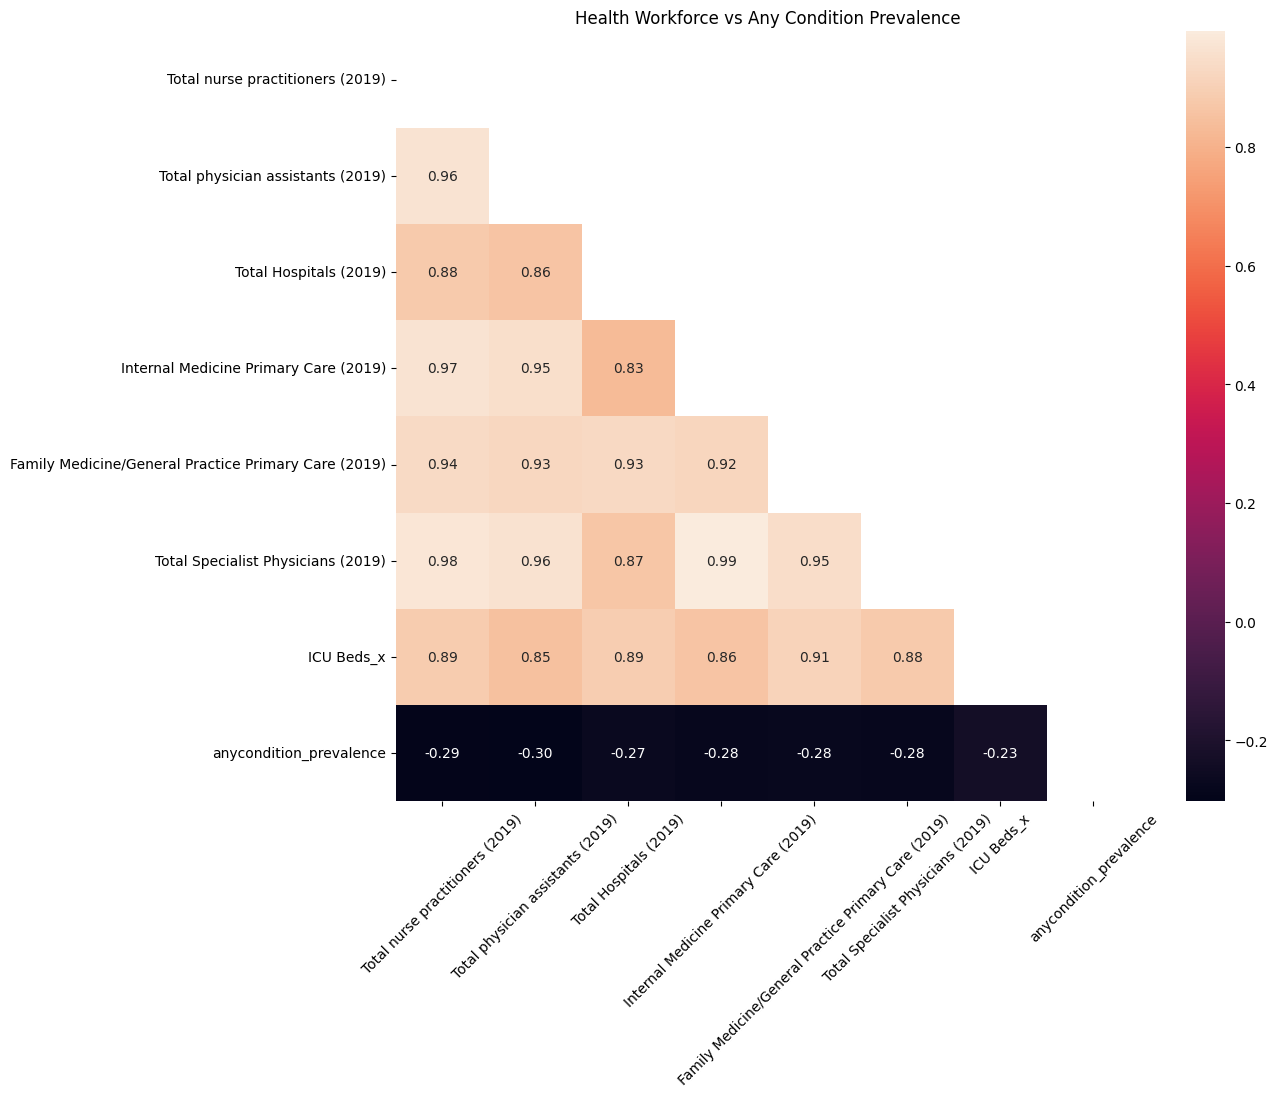

In [18]:
# Sixth group: other health workforce + target
health_workers_columns = ["Total nurse practitioners (2019)", "Total physician assistants (2019)", "Total Hospitals (2019)", "Internal Medicine Primary Care (2019)",
                           "Family Medicine/General Practice Primary Care (2019)", "Total Specialist Physicians (2019)", "ICU Beds_x", "anycondition_prevalence"]

corr = df[health_workers_columns].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

fig, axis = plt.subplots(figsize = (12, 10))
sns.heatmap(corr, mask = mask, annot = True, fmt = ".2f")
plt.title("Health Workforce vs Any Condition Prevalence")
plt.xticks(rotation = 45)
plt.show()

In [19]:
# Dropping highly correlated and redundant variables
df = df.drop(["Total physician assistants (2019)", "Total Hospitals (2019)", "Family Medicine/General Practice Primary Care (2019)", "ICU Beds_x"], axis = 1)

### Observations
In the Health Workforce group, many variables have very high positive correlations (above 0.90), which means they show almost the same information. To avoid repeating the same data and make the model simpler, we remove some variables that are very similar to others. We keep important features like total nurse practitioners, internal medicine primary care doctors, and total specialist doctors because they represent key parts of healthcare. We remove total physician assistants, total hospitals, family/general practice doctors, and ICU beds because they are strongly linked to the features we kept.

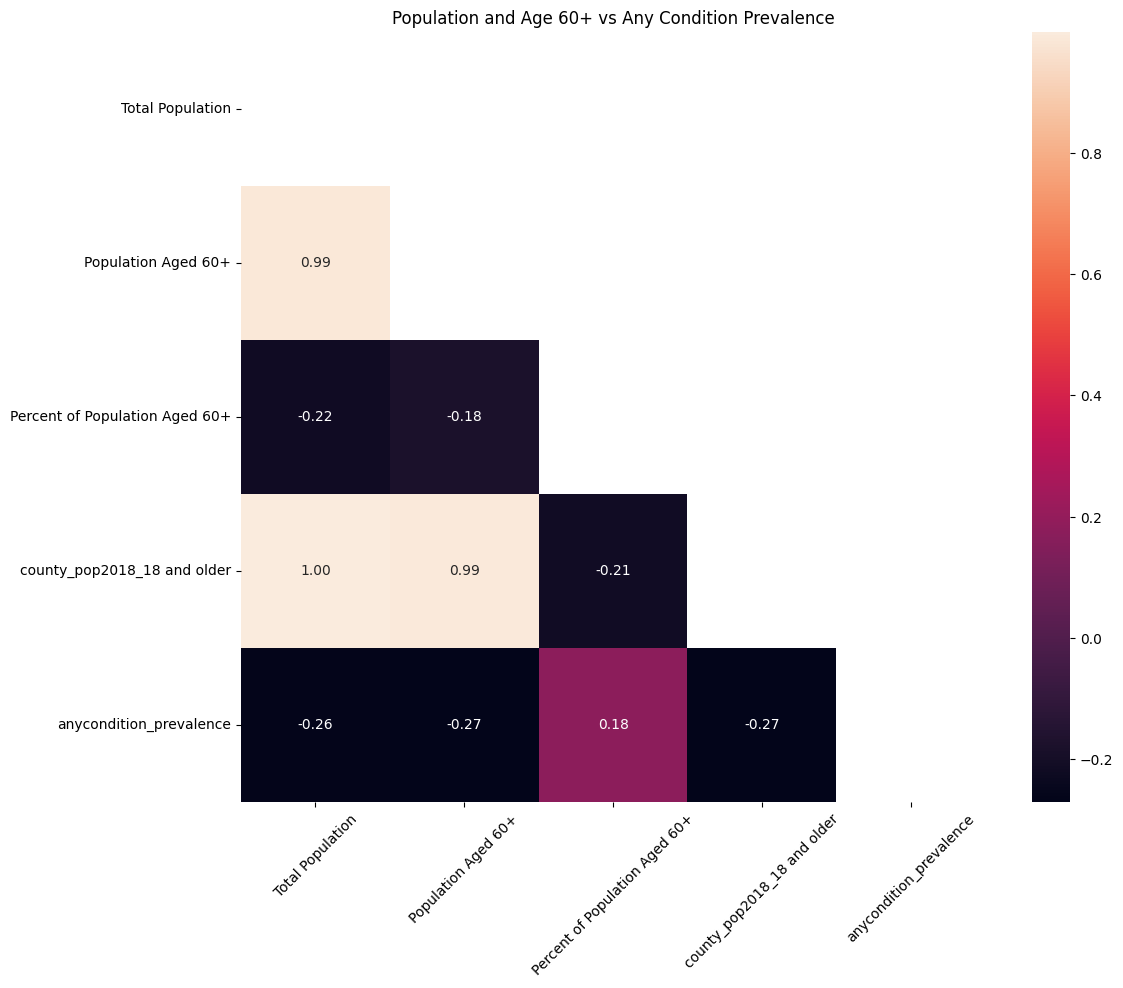

In [20]:
# Seventh group: population & age 60+ + target
pop_age_columns = ["Total Population", "Population Aged 60+", "Percent of Population Aged 60+", "county_pop2018_18 and older", "anycondition_prevalence"]

corr = df[pop_age_columns].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

fig, axis = plt.subplots(figsize = (12, 10))
sns.heatmap(corr, mask = mask, annot = True, fmt = ".2f")
plt.title("Population and Age 60+ vs Any Condition Prevalence")
plt.xticks(rotation = 45)
plt.show()

In [21]:
# Dropping highly correlated columns
df = df.drop(["county_pop2018_18 and older", "Population Aged 60+"], axis = 1)

### Observations
We decided to keep Total Population and remove county_pop2018_18 and older and Population Aged 60+ because these two variables have almost perfect correlation (1.0 and 0.99), meaning they provide nearly identical information. Keeping highly correlated variables can cause redundancy and affect model performance. Regarding the target variable (anycondition_prevalence), these population variables show low correlations (between -0.27 and 0.18), indicating a weak relationship with the target. Therefore, simplifying by removing redundant columns is reasonable without losing meaningful information.

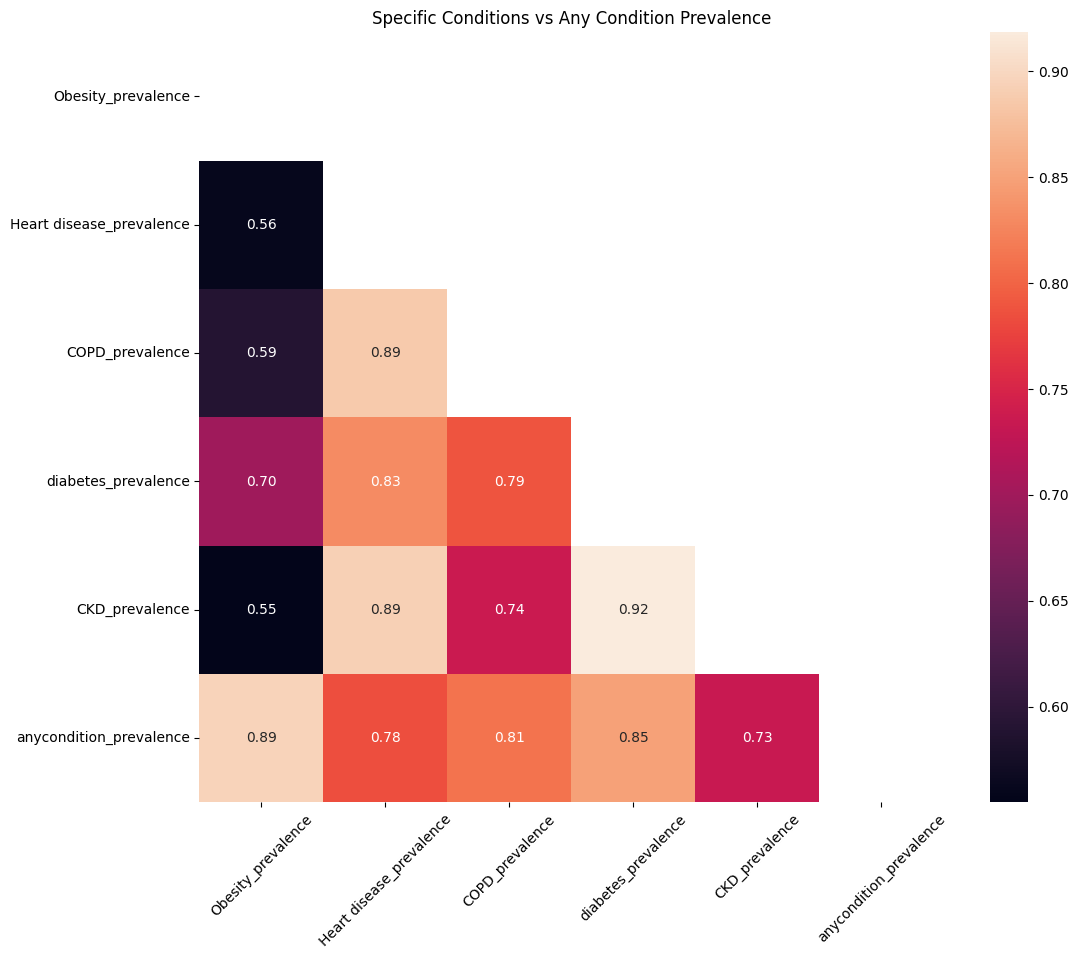

In [22]:
# Eight group: specific conditions + target
conditions_columns = ["Obesity_prevalence", "Heart disease_prevalence", "COPD_prevalence", "diabetes_prevalence", "CKD_prevalence", "anycondition_prevalence"]

corr = df[conditions_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize = (12, 10))
sns.heatmap(corr, mask = mask, annot = True, fmt = ".2f")
plt.title("Specific Conditions vs Any Condition Prevalence")
plt.xticks(rotation = 45)
plt.show()

In [23]:
# Combining highly correlated condition prevalences
df["CKD_Diabetes_prevalence"] = df["CKD_prevalence"] + df["diabetes_prevalence"]
df["COPD_HeartDisease_prevalence"] = df["COPD_prevalence"] + df["Heart disease_prevalence"]

In [24]:
# Drop original columns
df = df.drop(columns = ["CKD_prevalence", "diabetes_prevalence", "COPD_prevalence", "Heart disease_prevalence"], axis = 1)

### Observations
We combined CKD_prevalence and diabetes_prevalence into a single composite variable, and COPD_prevalence and Heart disease_prevalence into another composite variable. These pairs showed very high correlations (0.92 and 0.89), indicating that they capture very similar information. By creating composites, we reduce redundancy in the dataset while preserving the overall signal. The target variable, anycondition_prevalence, shows strong positive correlations with all these conditions. After combining, the new composite variables maintain these associations, allowing us to keep meaningful predictors without overrepresenting highly correlated conditions.

In [25]:
# Cheching new shape of our dataframe
df.shape

(3140, 41)

## Train / Test Split

In [26]:
# Define X (features) and y (target)
X = df.drop(columns = ["anycondition_prevalence"])
y = df["anycondition_prevalence"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature Scaling

In [27]:
# Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)

X_train_scaled.head()

,fips,TOT_POP,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,...,diabetes_number,CKD_number,Urban_rural_code,age 0-19 pct %,age 20-39 pct %,age 40-59 pct %,age 60-79 pct %,age 80+ pct %,CKD_Diabetes_prevalence,COPD_HeartDisease_prevalence
1292,-0.301633,-0.229763,0.648457,-0.557226,-0.096503,-0.431441,-0.096315,-0.301256,0.116936,0.161338,...,-0.215940,-0.216950,0.910528,0.141219,-0.595358,-0.029874,0.492995,-0.117970,0.317122,0.941343
2302,0.761573,-0.161280,0.759892,-0.564855,-0.279693,-0.390334,-0.094787,-0.578354,-0.505673,1.977925,...,-0.135257,-0.135212,0.249092,-0.861078,-0.874172,0.803986,0.884464,0.651730,0.037326,0.361314
761,-0.833037,-0.198764,0.538703,-0.379993,-0.260687,-0.181013,-0.090267,-0.452704,-0.409887,1.335132,...,-0.188714,-0.204982,-1.735217,-0.190998,0.932598,0.096979,-0.628131,-0.383537,-0.429001,-0.294372
2194,0.629287,-0.048115,-0.579575,-0.556409,1.463210,-0.023228,-0.053735,4.219485,-0.872853,-0.201980,...,-0.057561,-0.055748,-1.073780,0.358119,0.209315,0.566097,-0.547788,-0.613492,-0.708797,-0.445684
1241,-0.308413,0.070012,-0.191312,0.134914,-0.205375,0.508352,-0.092452,0.927792,-0.713210,0.301075,...,0.100319,0.108446,-0.412344,0.265771,0.158728,0.029874,-0.323471,-0.148575,-0.180293,0.083908


## Linear Regression

In [28]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
# Model's intercept and coefficients
f"Intercept (a): {model.intercept_}, Coefficients (b): {model.coef_}"

'Intercept (a): 46.763057417634606, Coefficients (b): [ 4.38445490e-03 -9.44709315e+00 -1.88807855e+08 -1.67133707e+08\n -8.90569114e+07 -3.30954772e+07 -1.22423972e+07 -1.74288232e+07\n -1.16546498e+00 -1.26151739e+00 -7.89504930e-01 -1.91870615e+00\n -2.09602734e-01  5.63803703e-02  4.14953923e-01  7.02154948e-02\n  1.70018555e+00 -1.62622644e+00 -2.83554873e-01  1.22695485e-01\n  9.64950427e-01 -7.48852092e-01  2.20603835e-01  4.02405189e+00\n  1.36481751e-01  2.37543643e+01  3.37436196e+00 -1.30374378e+01\n -3.19876728e-01 -3.88656367e+00 -3.29821936e+00  1.22462902e+00\n -1.32423788e-01  2.68674553e+06  3.11391963e+06  1.63914255e+06\n  3.36307149e+06  1.14040293e+06  1.23781750e+00  2.32015043e+00]'

In [38]:
# Make predictions on the test set
y_pred_train  = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
y_pred_train, y_pred_test

(array([51.53588722, 46.20109059, 45.37073956, ..., 53.47674101,
        53.34478283, 45.54232738], shape=(2512,)),
 array([50.18512193, 39.57648535, 62.65905082, 41.43393386, 33.72206714,
        37.61189845, 43.28990898, 60.46851762, 43.46250317, 34.54991478,
        46.85565357, 55.09329667, 39.74210316, 52.79786219, 41.96289523,
        48.20969503, 48.24504584, 51.01922079, 58.34789523, 41.6180408 ,
        51.4644592 , 48.15614234, 42.81956567, 51.6001177 , 50.15235643,
        37.7443912 , 27.39926209, 46.49494899, 44.0790684 , 58.04631674,
        59.58709154, 59.31993569, 49.57476378, 46.0538723 , 41.17341944,
        54.3668067 , 48.65488122, 40.74416227, 49.9139754 , 39.99682907,
        56.28633904, 45.35828902, 45.21992258, 46.40447945, 42.87918385,
        54.01061559, 51.35235392, 46.29540657, 52.52832589, 58.44898311,
        46.28379945, 62.79061724, 42.1511959 , 51.65393521, 49.33415951,
        58.80840655, 38.62397536, 44.05435521, 49.15957273, 47.70059995,
        

In [ ]:
# Evaluating model's performance (Mean Squared Error (MSE) and the Coefficient of Determination (R^2)) and comparing the results of X_train and X_test
f"Train - MSE: {mean_squared_error(y_train, y_pred_train)}, R^2: {r2_score(y_train, y_pred_train)} | Test - MSE: {mean_squared_error(y_test, y_pred_test)}, R^2: {r2_score(y_test, y_pred_test)}"

'Train - MSE: 1.9233346000557976, R^2: 0.9527286556962882 | Test - MSE: 2.042902943898987, R^2: 0.9497495982154982'

### Observations
The model performs very well, with high R2 values and low MSE on both training and test sets, indicating good generalization and no signs of overfitting.The model explains 94.97% of the variance in the target. It is very effective, showing that the features can predict the outcome accurately.

## Lasso Model

In [32]:
# Create Lasso model
lasso_model = Lasso(alpha = 0.5, max_iter = 400, random_state = 18)
lasso_model.fit(X_train_scaled, y_train)

,alpha,0.5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,400
,tol,0.0001
,warm_start,False
,positive,False
,random_state,18
,selection,'cyclic'


In [43]:
# Make predictions
y_pred_lasso_train = lasso_model.predict(X_train_scaled)
y_pred_lasso_test = lasso_model.predict(X_test_scaled)
y_pred_lasso_train, y_pred_lasso_test

(array([51.6096672 , 46.1600264 , 44.88774414, ..., 53.11234053,
        52.98842742, 45.7322474 ], shape=(2512,)),
 array([49.61132017, 39.16857289, 61.12203859, 42.13034964, 35.35399414,
        38.97798608, 44.07806073, 59.35919059, 43.53590012, 36.26559788,
        46.93155283, 54.13106721, 40.1750238 , 52.52116943, 41.99063155,
        47.74260426, 44.64826601, 50.54041225, 57.14230895, 42.80979033,
        50.63063977, 48.0642496 , 42.70087559, 51.44779606, 46.12727041,
        37.74154113, 29.9415598 , 47.67480972, 44.25396181, 58.33746415,
        58.68562179, 58.79758606, 49.28453198, 46.02650881, 41.45938872,
        53.68705414, 48.53006187, 41.80218044, 48.92549795, 40.80661668,
        55.4879105 , 44.65480609, 45.63197341, 46.75396809, 42.81055721,
        53.02039954, 51.70086979, 45.92027603, 51.88726161, 57.13170828,
        44.77583426, 61.45080644, 42.11178628, 50.93957497, 49.95281614,
        58.0771771 , 40.00280606, 44.4208932 , 48.79413613, 47.05653081,
        

In [44]:
# Evaluating Lasso's model performance (Mean Squared Error (MSE) and the Coefficient of Determination (R^2)) and comparing the results of X_train and X_test
f"Train - MSE: {mean_squared_error(y_train, y_pred_lasso_train)}, R^2: {r2_score(y_train, y_pred_lasso_train)} | Test - MSE: {mean_squared_error(y_test, y_pred_lasso_test)}, R^2: {r2_score(y_test, y_pred_lasso_test)}"

'Train - MSE: 2.8643964258709858, R^2: 0.9295994208882112 | Test - MSE: 2.9093766167554125, R^2: 0.9284364710663303'

### Observations
The Lasso model performs well, with slightly higher errors than the previous model, but still maintains high R2 values and minimal difference between training and test sets, indicating good generalization and no significant overfitting. The model explains 92.84% of the variance, slightly less effective than linear regression. Regularization reduced some coefficients, which slightly decreased prediction accuracy.

## Lasso CV model

In [35]:
# Create LassoCV model (alpha from 0 to 20)
lasso_cv_model = LassoCV(alphas = np.linspace(0, 20, 50), cv = 5, max_iter = 10000, random_state = 18)
lasso_cv_model.fit(X_train_scaled, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.897e+03, tolerance: 7.951e+00
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-p

,eps,0.001
,n_alphas,'deprecated'
,alphas,array([ 0. ... 20. ])
,fit_intercept,True
,precompute,'auto'
,max_iter,10000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [46]:
# Make predictions on the test set
y_pred = lasso_cv_model.predict(X_test_scaled)
y_pred

array([50.24622906, 39.54760077, 62.6646383 , 41.47515675, 33.7694016 ,
       37.62571211, 43.28052016, 60.44930699, 43.44393194, 34.60851456,
       46.87464743, 55.11961039, 39.77632611, 52.87000732, 41.89811914,
       48.2180675 , 48.32794192, 50.97680773, 58.31325092, 41.61506772,
       51.4788818 , 48.17695947, 42.750121  , 51.63418441, 50.14005911,
       37.69307014, 27.39565302, 46.49100963, 44.14754204, 58.01406632,
       59.61905589, 59.2733268 , 49.57149487, 46.02656829, 41.22183233,
       54.40749543, 48.6188976 , 40.70692053, 49.93030855, 40.01004309,
       56.26923375, 45.38968889, 45.24719572, 46.41163645, 42.87087454,
       53.99964065, 51.32262327, 46.32552172, 52.45612021, 58.41157175,
       46.26136503, 62.78294776, 42.14341798, 51.70520196, 49.31871025,
       58.77017952, 38.68032396, 44.09035549, 49.14192547, 47.64601972,
       35.38336823, 45.93515517, 53.49068875, 37.04300749, 41.74333549,
       40.87387092, 47.87213027, 48.48009776, 45.68148384, 44.39

In [47]:
# Evaluate performance
f"MSE: {mean_squared_error(y_test, y_pred)}, R^2: {r2_score(y_test, y_pred)}, Best alpha: {lasso_cv_model.alpha_}"

'MSE: 2.0372881875402755, R^2: 0.9498877074505893, Best alpha: 0.0'

### Observations
This model explains 94.98% of the variance. The cross-validation found the best alpha to be 0.0, so the model behaves almost exactly like simple linear regression.

## Final conclussion
The best model is LassoCV, because it achieves the highest (94.98%) and automatically confirms that no regularization is needed. Linear regression performs almost the same, so both are very effective. Lasso without cross-validation is slightly worse.